C:\Users\Stijn\AppData\Local\Temp\ipykernel_10804\3334373331.py:13: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['DE_KN_residential4_grid_import'].iloc[0] = 0
C:\Users\Stijn\AppData\Local\Temp\ipykernel_10804\3334373331.py:13: SettingWit

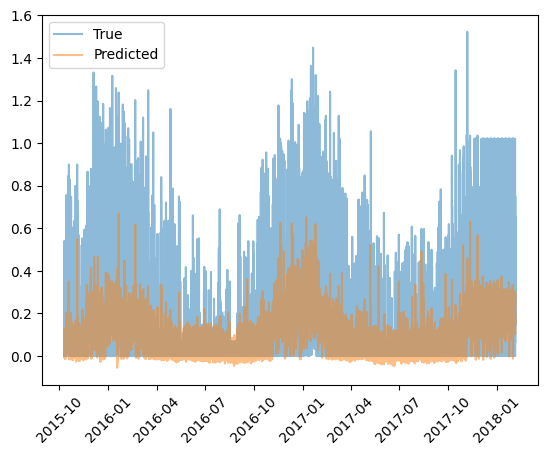

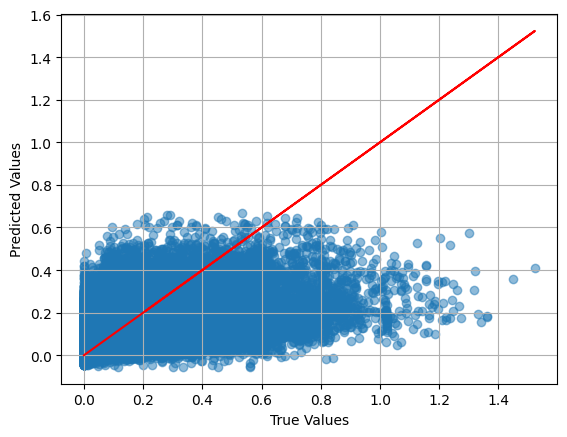

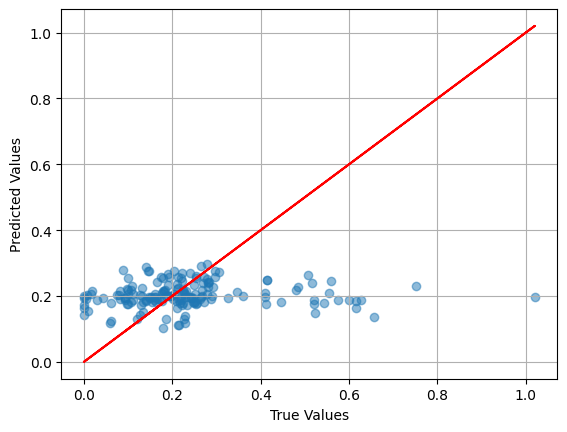

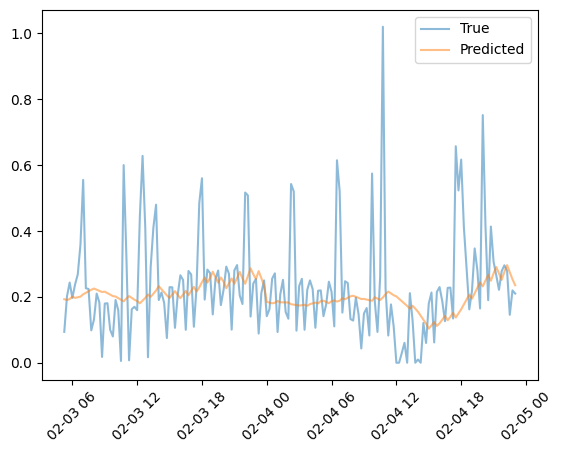

Interrupted by user


In [6]:


import matplotlib.pyplot as plt

from river import tree, metrics, evaluate, stream,linear_model as linear
from itertools import product
import pandas as pd
from multiprocessing import Pool
from river import compose
from river import preprocessing

def load_and_preprocess_data():
    df = pd.read_csv('residential4_grid_import_export_weather_fixed_timestamps.csv')
    df['DE_KN_residential4_grid_import'] = df['DE_KN_residential4_grid_import'].diff()
    df['DE_KN_residential4_grid_import'].iloc[0] = 0
    df['utc_timestamp'] = pd.to_datetime(df['utc_timestamp'])
    df['day_of_week'] = df['utc_timestamp'].dt.dayofweek
    df['hour_of_day'] = df['utc_timestamp'].dt.hour
    df['month'] = df['utc_timestamp'].dt.month
    return df

df = load_and_preprocess_data()
features = ['utc_timestamp','hour_of_day','day_of_week','month', 'temp','season_Summer','season_Winter','season_Spring','season_Autumn','holiday']
target = 'DE_KN_residential4_grid_import'

# New code to filter the dataframe
df = df[features + [target]]

best_params = {'C': 4e-05, 'mode': 1, 'eps': 0.0001, 'learn_intercept': True}


best_model = linear.PARegressor(**best_params)
y_pred = []
y_true = []
for _, row in df.iterrows():
    xi = row.drop(target).drop('utc_timestamp')
    yi = row[target]
    y_pred.append(best_model.predict_one(xi.to_dict()))
    best_model.learn_one(xi.to_dict(), yi)
    y_true.append(yi)

# Plot the predicted values
plt.plot(df['utc_timestamp'], y_true, alpha=0.5, label='True')
plt.plot(df['utc_timestamp'], y_pred, alpha=0.5, label='Predicted')
#rotate x-axis labels
plt.xticks(rotation=45)
plt.legend()
plt.show()


# Scatter plot of true vs predicted values
plt.scatter(y_true, y_pred, alpha=0.5)
plt.plot(y_true, y_true, 'r')  # red line for perfect predictions
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.grid(True)  # add a grid
plt.show()

plt.scatter(y_true[-168:], y_pred[-168:], alpha=0.5)
plt.plot(y_true[-168:], y_true[-168:], 'r')  # red line for perfect predictions
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.grid(True)  # add a grid
plt.show()


plt.plot(df['utc_timestamp'][-168*4:], y_true[-168*4:], alpha=0.5, label='True')
plt.plot(df['utc_timestamp'][-168*4:], y_pred[-168*4:], alpha=0.5, label='Predicted')
#rotate x-axis labels
plt.xticks(rotation=45)

plt.legend()
plt.show()


print("Interrupted by user")